TODO: introduce schema change upstream (in the table from ex1), have it affect a downstream table

# Data Downtime Challenge | Exercise 1

## 0. Setup

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
import sqlite3

conn = sqlite3.connect('Ex2.db')
c = conn.cursor()

## 1. Introduction

In [8]:
c.execute("PRAGMA table_info(EXOPLANETS);")
c.fetchall()

[(0, '_id', 'TEXT', 0, None, 0),
 (1, 'distance', 'REAL', 0, None, 0),
 (2, 'g', 'REAL', 0, None, 0),
 (3, 'orbital_period', 'REAL', 0, None, 0),
 (4, 'avg_temp', 'REAL', 0, None, 0),
 (5, 'date_added', 'TEXT', 0, None, 0),
 (6, 'eccentricity', 'REAL', 0, None, 0),
 (7, 'atmosphere', 'TEXT', 0, None, 0)]

In [9]:
pd.read_sql_query("SELECT * FROM EXOPLANETS LIMIT 10", conn)

,_id,distance,g,orbital_period,avg_temp,date_added,eccentricity,atmosphere
0,c168b188-ef0c-4d6a-8cb2-f473d4154bdb,34.627304,NaN,476.480044,NaN,2020-01-01,None,None
1,e7b56e84-41f4-4e62-b078-01b076cea369,110.196920,2.525074,839.837817,NaN,2020-01-01,None,None
2,a27030a0-e4b4-4bd7-8d24-5435ed86b395,26.695795,10.276497,301.018816,NaN,2020-01-01,None,None
3,54f9cf85-eae9-4f29-b665-855357a14375,54.888352,NaN,173.788968,328.644125,2020-01-01,None,None
4,4d06ec88-f5c8-4d03-91ef-7493a12cd89e,153.264217,0.922875,200.712662,NaN,2020-01-01,None,None
5,e16250b8-2d9d-49f3-aaef-58eed9a8864c,7.454811,5.503701,763.561710,245.129285,2020-01-01,None,None
6,a0a6bf97-90d5-4686-8ccb-10753f8d335e,4.925946,0.953473,486.053323,267.786557,2020-01-01,None,None
7,b28b4e19-8517-4ab5-97f0-c445f1aae6c4,94.540173,7.118254,629.287426,368.859206,2020-01-01,None,None
8,7e34e44e-663f-491c-96c5-bb5acb8d5f1e,19.786255,3.999081,744.106326,180.445029,2020-01-01,None,None
9,305e8ea0-663b-4311-b6b3-4198c051c335,95.654030,0.677212,472.344447,NaN,2020-01-01,None,None


In [10]:
c.execute("PRAGMA table_info(HABITABLES);")
c.fetchall()

[(0, '_id', 'TEXT', 0, None, 0),
 (1, 'perihelion', 'REAL', 0, None, 0),
 (2, 'aphelion', 'REAL', 0, None, 0),
 (3, 'atmosphere', 'TEXT', 0, None, 0),
 (4, 'habitability', 'REAL', 0, None, 0)]

In [13]:
pd.read_sql_query("SELECT * FROM HABITABLES LIMIT 10", conn)

,_id,perihelion,aphelion,atmosphere,habitability
0,c168b188-ef0c-4d6a-8cb2-f473d4154bdb,None,None,None,0.768373
1,e7b56e84-41f4-4e62-b078-01b076cea369,None,None,None,0.696219
2,a27030a0-e4b4-4bd7-8d24-5435ed86b395,None,None,None,0.291440
3,54f9cf85-eae9-4f29-b665-855357a14375,None,None,None,0.532590
4,4d06ec88-f5c8-4d03-91ef-7493a12cd89e,None,None,None,0.420317
5,e16250b8-2d9d-49f3-aaef-58eed9a8864c,None,None,None,0.835647
6,a0a6bf97-90d5-4686-8ccb-10753f8d335e,None,None,None,0.952850
7,b28b4e19-8517-4ab5-97f0-c445f1aae6c4,None,None,None,0.520321
8,7e34e44e-663f-491c-96c5-bb5acb8d5f1e,None,None,None,0.894001
9,305e8ea0-663b-4311-b6b3-4198c051c335,None,None,None,0.315581


## Exercise: Understanding Schema Change

In [20]:
from datetime import datetime, timedelta
all_days = []
date = datetime(2020, 1, 1)
for _ in range(250):
    all_days.append(date.strftime("%Y-%m-%d"))
    date += timedelta(days=1)
all_days = pd.Index(all_days)

In [24]:
SQL = """
SELECT
    DATE_ADDED,
    SUM(CASE WHEN ECCENTRICITY IS NULL THEN 0 ELSE 1 END) AS ECCENTRICITY_COUNT_ADDED,
    SUM(CASE WHEN ATMOSPHERE IS NULL THEN 0 ELSE 1 END) AS ATMOSPHERE_COUNT_ADDED 
FROM
    EXOPLANETS
GROUP BY
    DATE_ADDED
"""

In [27]:
count_added = pd.read_sql_query(SQL, conn)
count_added = count_added \
    .rename(columns={clmn: clmn.lower() for clmn in count_added.columns})
count_added = count_added.set_index("date_added")
count_added = count_added.reindex(all_days)

These plots show the number of new entries with values for `eccentricity` and `atmosphere` respectively on each day. Note that on July 19, entries abruptly start filling in because of the addition to the schema.

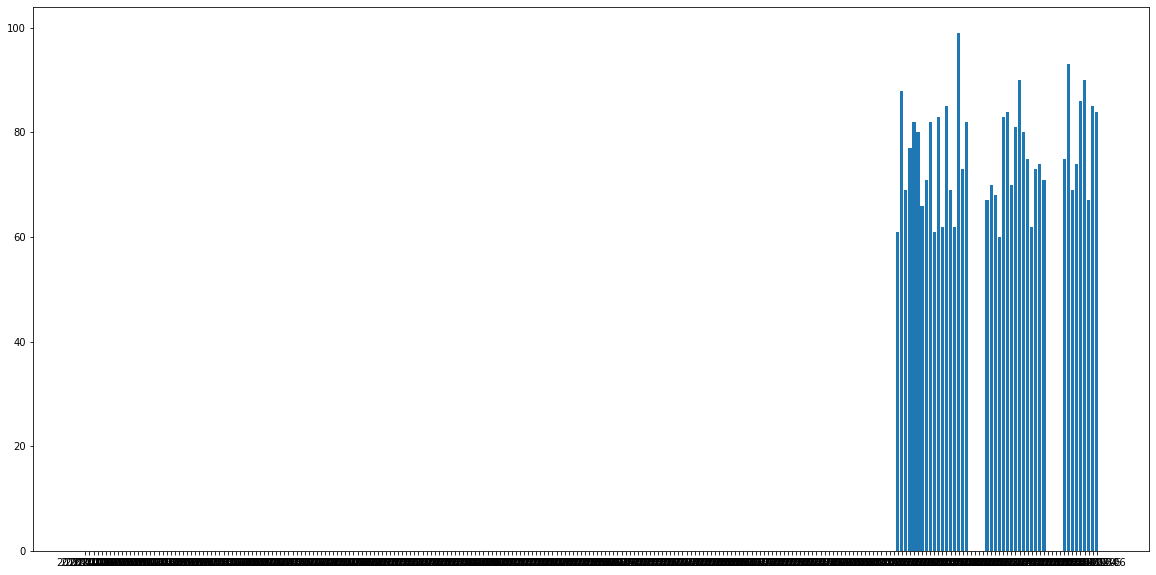

In [28]:
plt.figure(figsize=(20, 10))
plt.bar(all_days, height=count_added["eccentricity_count_added"])
plt.show()

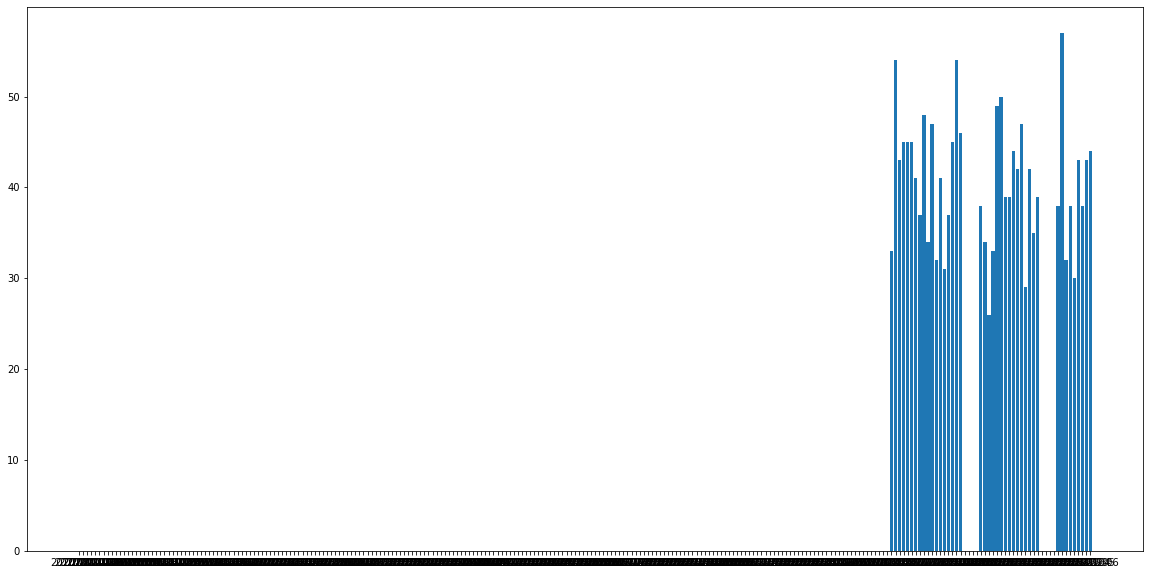

In [41]:
plt.figure(figsize=(20, 10))
# TODO plt.xticks()
plt.bar(all_days, height=count_added["atmosphere_count_added"])
plt.show()

In [46]:
SQL = """
SELECT
    HABITABILITY
FROM
    HABITABLES
"""

In [48]:
avg_habitability = pd.read_sql_query(SQL, conn)
avg_habitability = avg_habitability \
    .rename(columns={clmn: clmn.lower() for clmn in avg_habitability.columns})

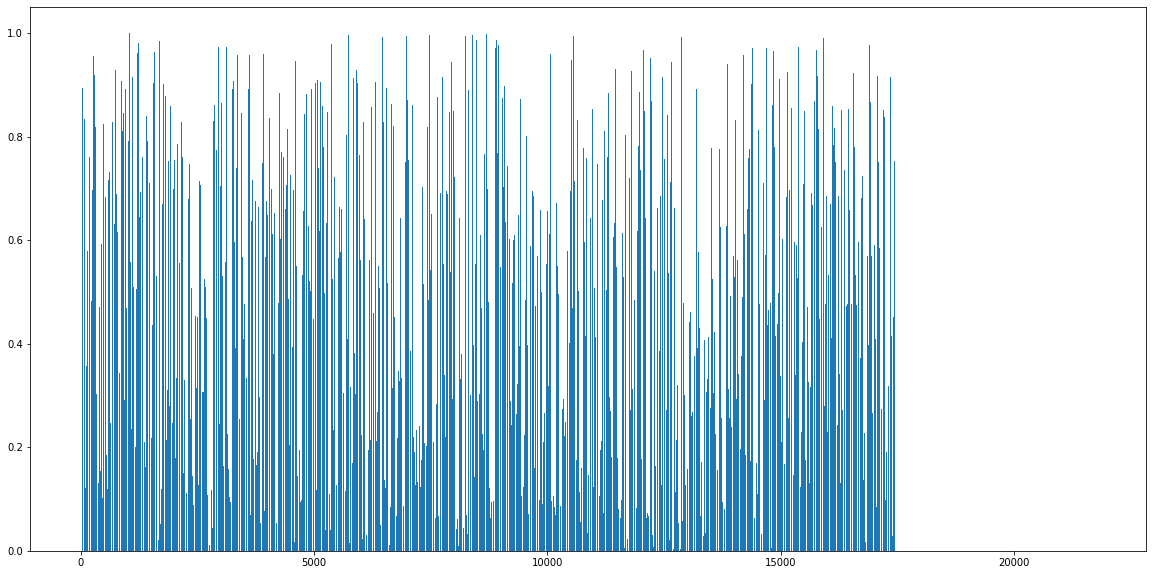

In [51]:
plt.figure(figsize=(20, 10))
plt.bar(avg_habitability.index, height=avg_habitability["habitability"])
plt.show()